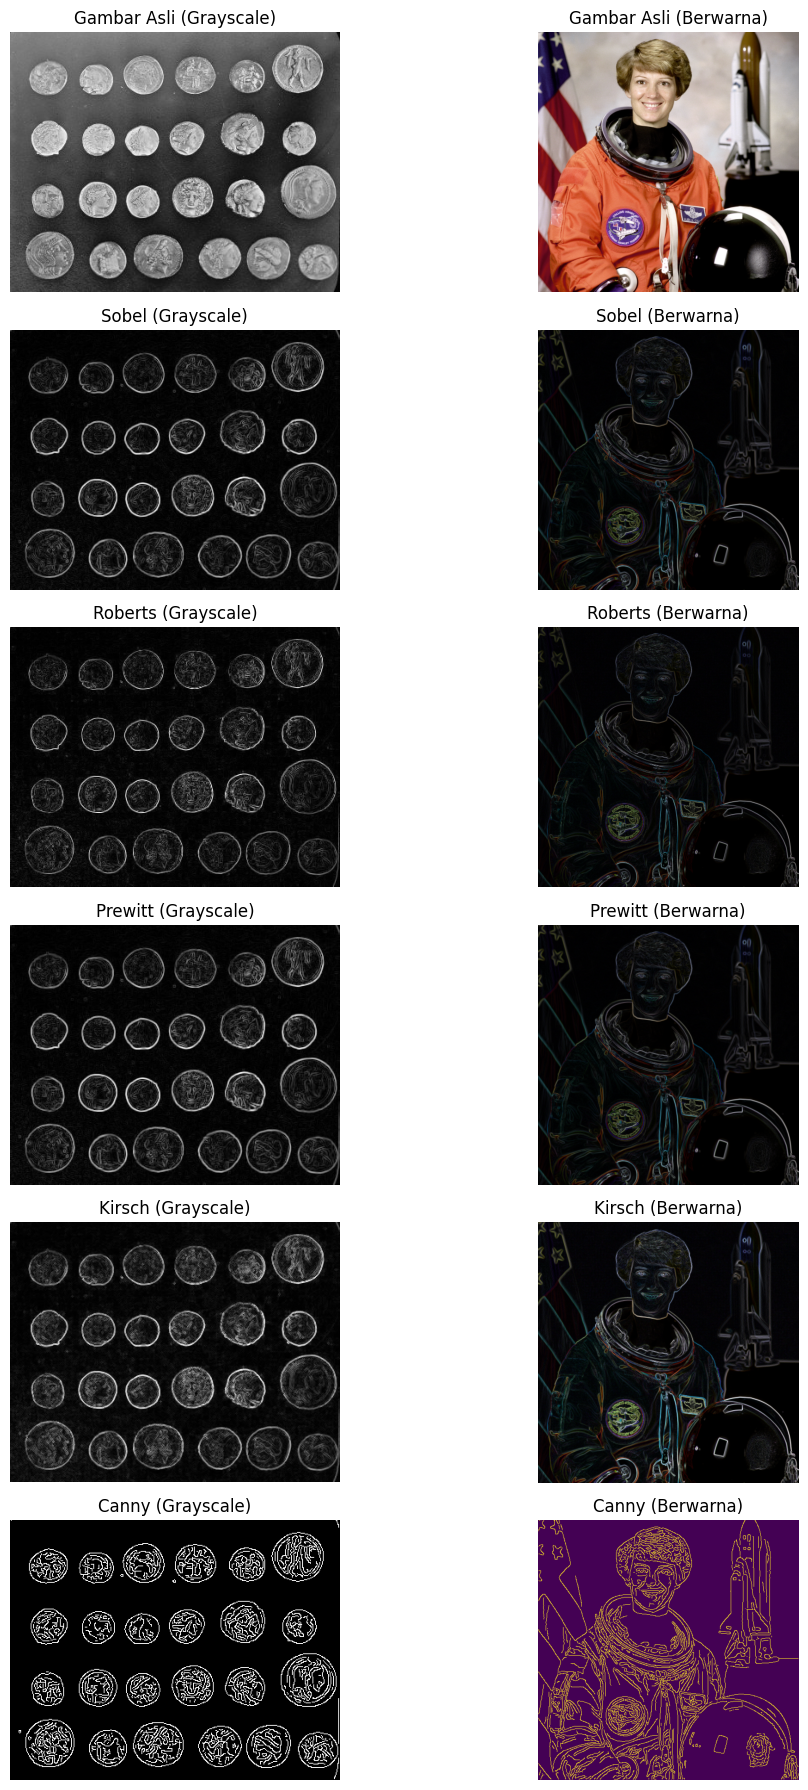

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters, feature
from skimage.filters.rank import gradient
from skimage.morphology import disk

# ===================== 1⃣ AMBIL GAMBAR GRAYSCALE & BERWARNA =====================
# Menggunakan gambar bawaan dari skimage
image_gray = data.coins()  # Gambar grayscale
image_color = data.astronaut()  # Gambar berwarna

# ===================== 2⃣ TERAPKAN BERBAGAI OPERATOR DETEKSI TEPI =====================
# Fungsi untuk menerapkan deteksi tepi pada setiap kanal warna
def apply_edge_detection(image, operator):
    """Menerapkan operator deteksi tepi pada setiap kanal warna (R, G, B)."""
    red = operator(image[:, :, 0])
    green = operator(image[:, :, 1])
    blue = operator(image[:, :, 2])
    return np.stack((red, green, blue), axis=2)

# ----- Pada Gambar Grayscale -----
sobel_gray = filters.sobel(image_gray)
roberts_gray = filters.roberts(image_gray)
prewitt_gray = filters.prewitt(image_gray)
kirsch_gray = gradient(image_gray, disk(1))
canny_gray = feature.canny(image_gray, sigma=1)

# ----- Pada Gambar Berwarna (Per Kanal RGB) -----
sobel_color = apply_edge_detection(image_color, filters.sobel)
roberts_color = apply_edge_detection(image_color, filters.roberts)
prewitt_color = apply_edge_detection(image_color, filters.prewitt)
kirsch_color = apply_edge_detection(image_color, lambda img: gradient(img, disk(1)))
canny_color = feature.canny(color.rgb2gray(image_color), sigma=1)  # Canny hanya untuk grayscale

# ===================== 3⃣ VISUALISASI HASIL =====================
fig, axes = plt.subplots(6, 2, figsize=(12, 18))
ax = axes.ravel()

# Operator yang digunakan untuk visualisasi
titles = [
    "Sobel", "Roberts", "Prewitt", "Kirsch", "Canny"
]
grayscale_results = [sobel_gray, roberts_gray, prewitt_gray, kirsch_gray, canny_gray]
color_results = [sobel_color, roberts_color, prewitt_color, kirsch_color, canny_color]

# ----- Baris 1: Gambar Asli -----
ax[0].imshow(image_gray, cmap="gray")
ax[0].set_title("Gambar Asli (Grayscale)")
ax[0].axis("off")

ax[1].imshow(image_color)
ax[1].set_title("Gambar Asli (Berwarna)")
ax[1].axis("off")

# Loop untuk hasil deteksi tepi
for i, title in enumerate(titles):
    # Grayscale
    ax[2 + i * 2].imshow(grayscale_results[i], cmap="gray")
    ax[2 + i * 2].set_title(f"{title} (Grayscale)")
    ax[2 + i * 2].axis("off")
    
    # Berwarna
    ax[3 + i * 2].imshow(color_results[i])
    ax[3 + i * 2].set_title(f"{title} (Berwarna)")
    ax[3 + i * 2].axis("off")

plt.tight_layout()
plt.show()
